In [ ]:
import numpy as np

# Problem 1: Recap of Today’s Notes
# Exercise: Write the form of the covariance matrix for a 3-variable system. What is the dimension of the covariance matrix?
# 3-variables: X, Y, Z
three_var_cov_mat = [
    ["Cov(X,X)", "Cov(X,Y)", "Cov(X,Z)"],
    ["Cov(Y,X)", "Cov(Y,Y)", "Cov(Y,Z)"],
    ["Cov(Z,X)", "Cov(Z,Y)", "Cov(Z,Z)"],
    ]

"""
Exercise: Read through the numpy documentation for the cov function. Implement your own covariance function (python suggested) based on these notes.
Then, apply your function to the two Examples on the documentation page. Compare your output with np.cov. Do you get the same answers?
"""
def my_cov(vectors):
    vec_1 = vectors[0]
    vec_2 = vectors[1]
    num_elements = len(vec_1)
    d_1 = 1 / (num_elements - 1) * sum([(num - np.mean(vec_1)) * (num - np.mean(vec_1)) for num in vec_1])
    d_2 = 1 / (num_elements - 1) * sum([(num - np.mean(vec_2)) * (num - np.mean(vec_2)) for num in vec_2])
    off_d = 1 / (num_elements - 1) * sum([(vec_1[idx] - np.mean(vec_1)) * (vec_2[idx] - np.mean(vec_2)) for idx in range(num_elements)])
    return [
        [d_1, off_d],
        [off_d, d_2],
    ]

print("----- my_cov output -----")
x = np.array([[0, 2], [1, 1], [2, 0]]).T
print(my_cov(x))

x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.stack((x, y), axis=0)
print(my_cov(X))

"""
Exercise: The numbers provided in the covariance matrix are “machine readable” but not always intuitive for human interpretation.
A correlation coefficient matrix provides a normalized measurement, with values always between -1 and 1, sometimes useful for interpretation.
Read through the numpy documentation for the corrcoef function and implement your own version on the problem you just completed.
"""
def my_corrcoef(vectors):
    cov = my_cov(vectors)
    num_elements = len(cov)

    def get_r(row, col, cov):
        return cov[row][col] / np.sqrt(cov[row][row] * cov[col][col])

    corrcoef_mat = np.zeros((num_elements, num_elements))

    for i in range(num_elements):
        for j in range(num_elements):
            corrcoef_mat[i][j] = get_r(i, j, cov)

    return corrcoef_mat

print("----- my_corrcoef output -----")
x = np.array([[0, 2], [1, 1], [2, 0]]).T
print(my_corrcoef(x))

x = [-2.1, -1,  4.3]
y = [3,  1.1,  0.12]
X = np.stack((x, y), axis=0)
print(my_corrcoef(X))

----- my_cov output -----
[[1.0, -1.0], [-1.0, 1.0]]
[[11.709999999999999, -4.2860000000000005], [-4.2860000000000005, 2.1441333333333334]]
----- my_corrcoef output -----
[[ 1. -1.]
 [-1.  1.]]
[[ 1.         -0.85535781]
 [-0.85535781  1.        ]]
[[ 1.         -0.85535781]
 [-0.85535781  1.        ]]


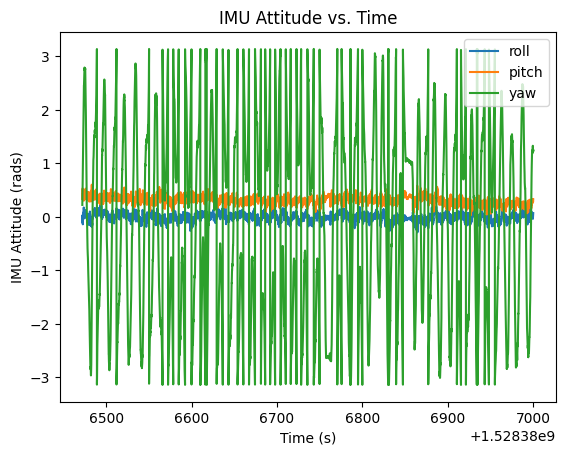

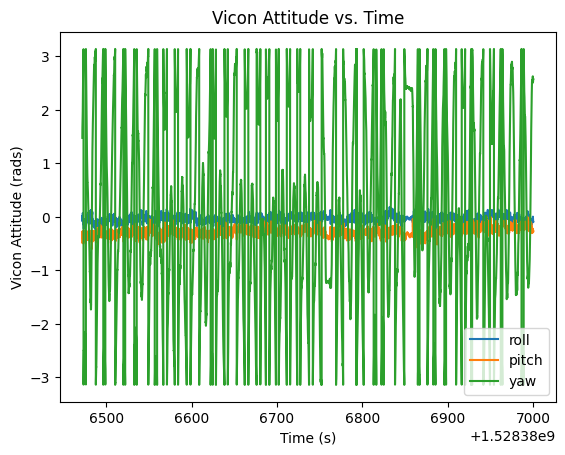

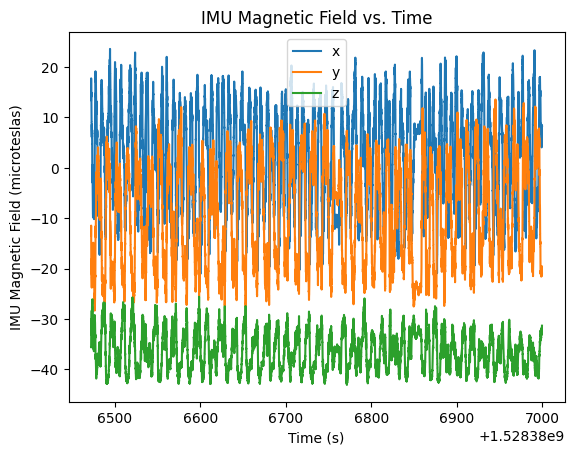

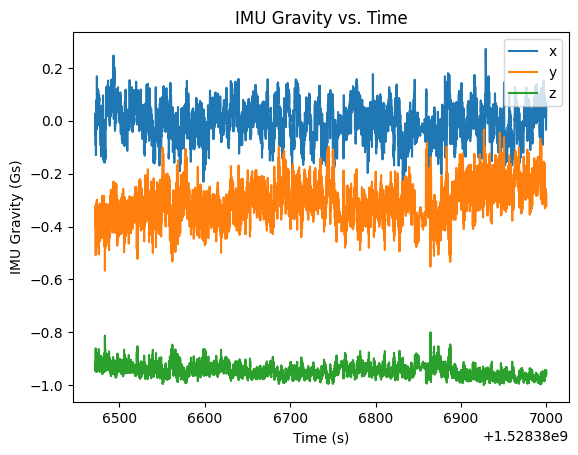

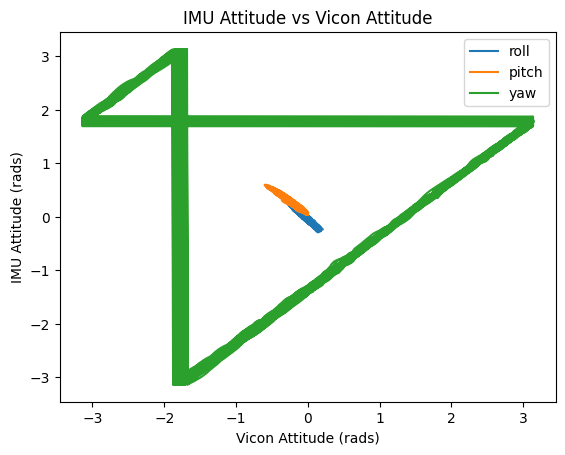

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Problem 2: Computing Covariances from Data
# Part A: Exploring the Dataset
# read in the data from the two files
imu_df = pd.read_csv("dataset/imu1.csv")  # replace filepath with yours
vicon_df = pd.read_csv("dataset/vi1.csv")  # replace filepath with yours

def make_plot(xdf, ydf, dep, indep, title, xlabel, ylabel):
    plt.figure()

    for idx in range(len(indep)):
        plt.plot(xdf[indep[idx]], ydf[dep[idx][0]], label = dep[idx][1])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

imu_attitude = [
    ("attitude_roll_radians", "roll"),
    ("attitude_pitch_radians", "pitch"),
    ("attitude_yaw_radians", "yaw"),
]
imu_attitude_title = "IMU Attitude vs. Time"
imu_attitude_label = "IMU Attitude (rads)"
time_label = "Time (s)"
time_list = ["Time", "Time", "Time"]

make_plot(imu_df, imu_df, imu_attitude, time_list, imu_attitude_title, time_label, imu_attitude_label)

vicon_attitude = [
    ("roll", "roll"),
    ("pitch", "pitch"),
    ("yaw", "yaw"),
]
vicon_attitude_title = "Vicon Attitude vs. Time"
vicon_attitude_label = "Vicon Attitude (rads)"

make_plot(vicon_df, vicon_df, vicon_attitude, time_list, vicon_attitude_title, time_label, vicon_attitude_label)

imu_mag = [
    ("magnetic_field_x_microteslas", "x"),
    ("magnetic_field_y_microteslas", "y"),
    ("magnetic_field_z_microteslas", "z"),
]
imu_mag_title = "IMU Magnetic Field vs. Time"
imu_mag_label = "IMU Magnetic Field (microteslas)"

make_plot(imu_df, imu_df, imu_mag, time_list, imu_mag_title, time_label, imu_mag_label)

imu_grav = [
    ("gravity_x_G", "x"),
    ("gravity_y_G", "y"),
    ("gravity_z_G", "z"),
]
imu_grav_title = "IMU Gravity vs. Time"
imu_grav_label = "IMU Gravity (Gs)"

make_plot(imu_df, imu_df, imu_grav, time_list, imu_grav_title, time_label, imu_grav_label)

vicon_attitude = ["roll", "pitch", "yaw"]
imu_vicon_title = "IMU Attitude vs Vicon Attitude"

make_plot(vicon_df, imu_df, imu_attitude, vicon_attitude, imu_vicon_title, vicon_attitude_label, imu_attitude_label)



In [ ]:
import pandas as pd
import numpy as np
# Problem 2: Computing Covariances from Data
# Part B: Comparing IMU Axes
# read in the data from the two files
imu_df = pd.read_csv("dataset/imu1.csv")  # replace filepath with yours
vicon_df = pd.read_csv("dataset/vi1.csv")  # replace filepath with yours